# Read activity data

The time-series data contains viewership activity of Wikipedia pages. The data is stored in a dictionary where keys are IDs of Wikipedia pages, and values are lists with number of visits per hour. Index of the lists correspond to an our. There are 5278 hours in total for every page (from 02:00, 23 September 2014 until 23:00, 30 April 2015).

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

Format plots

In [2]:
from pylab import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['figure.figsize'] = 15, 7
rcParams['xtick.labelsize'] = 25
rcParams['ytick.labelsize'] = 30
plt.style.use(['dark_background', 'seaborn-talk'])

### Read activations for every page (number of visits per hour)

In [3]:
pickle_in = open("activity.pickle","rb")

In [4]:
activations_dict = pickle.load(pickle_in)

### Read labels

This file can be exported from Gephi. Data Laboratory -> Nodes -> Export table

In [5]:
with open('id_label.csv') as f:
    ids_labels = f.readlines()
ids_labels = [x.strip() for x in ids_labels]

In [6]:
ids_labels = [(int(l[0]), l[1]) for l in [t.split(',') for t in ids_labels]]

In [7]:
import string
printable = set(string.printable)
ids_labels = [(int(l[0]), l[1]) for l in ids_labels]

In [8]:
ids_labels = dict(ids_labels)

### Plot viewership activity of one page

In [9]:
page_id = 30939720

Create labels for X axis

In [10]:
months = ['October', 'November', 'December', 'January', 'February', 'March', 'April']
x_month = [i for i in np.arange(8*24, len(activations_dict[page_id]), 30*24)]
x_month[1] = x_month[1] + 24 #October
x_month[2] = x_month[2] + 24 #November
x_month[3] = x_month[3] + 48 #December
x_month[4] = x_month[4] + 72 #January
x_month[5] = x_month[5] + 24 #February
x_month[6] = x_month[6] + 48 #March
x_month[7] = x_month[7] + 48 #April

In [11]:
ids_labels[page_id]

'2014_NHL_Entry_Draft'

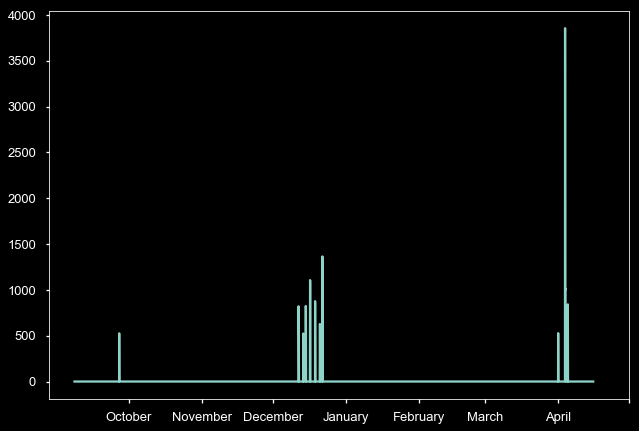

In [12]:
plt.plot(activations_dict[page_id])
plt.xticks([i + 15*24 for i in x_month], [month for month in months])
plt.show()